In [556]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [557]:
YoelSyncTrain = pd.read_csv("data/training/Yoel Raz/YoelSync.csv")
YoelSpontanTrain = pd.read_csv("data/training/Yoel Raz/YoelSpontan.csv")
YoelAloneTrain = pd.read_csv("data/training/Yoel Raz/YoelAlone.csv")

YaelSyncTrain = pd.read_csv("data/training/Yael Hagai/YaelSync.csv")
YaelSpontanTrain = pd.read_csv("data/training/Yael Hagai/YaelSpontan.csv")
YaelAloneTrain = pd.read_csv("data/training/Yael Hagai/YaelAlone.csv")

AloneTrain = pd.read_csv("data/HandRight.csv")


ItielSyncTest = pd.read_csv("data/validation/Itiel Lab/ItielSync.csv")
ItielSpontanTest = pd.read_csv("data/validation/Itiel Lab/ItielSpontan.csv")
ItielAloneTest = pd.read_csv("data/validation/Itiel Lab/ItielAlone.csv")

OdedSyncTest = pd.read_csv("data/validation/Oded/OdedSync.csv")
OdedSpontanTest = pd.read_csv("data/validation/Oded/OdedSpontan.csv")
OdedAloneTest = pd.read_csv("data/validation/Oded/OdedAlone.csv")

In [558]:
YoelSyncTrain = YoelSyncTrain.iloc[7:]
YoelSpontanTrain = YoelSpontanTrain.iloc[7:]
YoelAloneTrain = YoelAloneTrain.iloc[7:]

YaelSyncTrain = YaelSyncTrain.iloc[7:]
YaelSpontanTrain = YaelSpontanTrain.iloc[7:]
YaelAloneTrain = YaelAloneTrain.iloc[7:]

AloneTrain = AloneTrain.iloc[7:]


ItielSyncTest = ItielSyncTest.iloc[7:]
ItielSpontanTest = ItielSpontanTest.iloc[7:]
ItielAloneTest = ItielAloneTest.iloc[7:]

OdedSyncTest = OdedSyncTest.iloc[7:]
OdedSpontanTest = OdedSpontanTest.iloc[7:]
OdedAloneTest = OdedAloneTest.iloc[7:]

In [559]:
YoelSyncTrain.head()

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
7,485.0569,36965,right,2,61.23629,273.8329,78.92386,37.905410,-40.702510,-37.663810,...,-1.412653,108.0251,215.9905,78.16428,310.3008,47.23391,75.84945,0.0,0.0,0.0
8,485.0893,36967,left,2,-132.38730,216.2359,34.98578,-13.779130,25.758350,6.126483,...,0.990799,-175.6037,158.0649,51.65662,-349.8148,-30.35999,111.20590,0.0,0.0,0.0
9,485.0893,36967,right,2,62.83959,272.5950,77.94537,48.295460,-29.597140,-21.372390,...,-1.408216,109.1907,214.3973,77.23261,309.9377,43.83817,74.10175,0.0,0.0,0.0
10,485.1226,36968,left,2,-132.30030,216.1491,34.93516,4.800724,-4.793281,-2.795135,...,0.990521,-175.4859,157.9661,51.62913,-350.0567,-29.94596,111.74290,0.0,0.0,0.0
11,485.1226,36968,right,2,63.56062,272.3895,77.69290,39.813800,-11.347780,-13.940960,...,-1.406858,109.7369,214.0490,77.00372,309.7005,42.58615,73.17880,0.0,0.0,0.0


In [560]:
YoelSyncTrain.columns = YoelSyncTrain.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
YoelSpontanTrain.columns = YoelSpontanTrain.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
YoelAloneTrain.columns = YoelAloneTrain.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

YaelSyncTrain.columns = YaelSyncTrain.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
YaelSpontanTrain.columns = YaelSpontanTrain.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
YaelAloneTrain.columns = YaelAloneTrain.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

AloneTrain.columns = AloneTrain.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

ItielSyncTest.columns = ItielSyncTest.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
ItielSpontanTest.columns = ItielSpontanTest.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
ItielAloneTest.columns = ItielAloneTest.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

OdedSyncTest.columns = OdedSyncTest.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
OdedSpontanTest.columns = OdedSpontanTest.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
OdedAloneTest.columns = OdedAloneTest.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [561]:
AloneTrain

,time,frame_id,hand_type,#_hands,position_x,position_y,position_z,velocity_x,velocity_y,velocity_z,...,yaw,wrist_pos_x,wrist_pos_y,wrist_pos_z,elbow_pos_x,elbow_pos_y,elbow_pos_z,grab_strenth,grab_angle,pinch_strength
7,128.4051,15492,right,1,18.364570,219.3397,17.990680,5.799855,31.37051,-19.81732,...,-0.271675,49.18085,201.1090,84.17529,200.4424,33.57787,230.8575,0.0,0.283662,0.0
8,128.4214,15494,right,1,18.405520,220.4556,17.573670,0.046715,78.36597,-32.12088,...,-0.277499,49.43836,201.1063,83.36790,199.6805,32.06783,229.3652,0.0,0.305218,0.0
9,128.4380,15496,right,1,18.293360,222.1953,17.228530,-10.397290,97.65856,-15.44083,...,-0.288245,49.79055,201.8538,82.53721,199.1181,32.01506,228.5434,0.0,0.351661,0.0
10,128.4547,15498,right,1,18.205560,223.6056,17.362270,0.300404,74.32468,22.26440,...,-0.300449,50.22053,202.4105,82.17856,198.7624,32.08682,228.4237,0.0,0.466381,0.0
11,128.4712,15500,right,1,18.341280,224.4987,17.812240,9.184148,49.51511,22.58200,...,-0.310815,50.76582,202.7484,82.26896,199.3933,33.14685,229.2643,0.0,0.599450,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807,208.1942,24687,right,1,-15.404800,208.0276,9.980799,167.862400,510.08520,-105.52950,...,-0.282299,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.503490,0.0
4808,208.2108,24689,right,1,-12.678650,218.1196,9.314082,145.009700,562.35940,-20.70701,...,-0.263492,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.403687,0.0
4809,208.2276,24691,right,1,-9.643562,228.2807,9.722980,180.421600,591.90190,28.88057,...,-0.234336,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.310940,0.0
4810,208.2443,24692,right,1,-7.980715,233.5056,10.419080,192.459300,604.73440,80.56698,...,-0.222084,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.286526,0.0


In [562]:
YoelAloneTrain = YoelAloneTrain.rename(columns=lambda x: x+'_x')
AloneTrain = AloneTrain.rename(columns=lambda x: x+'_y') 
YaelAloneTrain = YaelAloneTrain.rename(columns=lambda x: x+'_x')

OdedAloneTest = OdedAloneTest.rename(columns=lambda x: x+'_x')
ItielAloneTest = ItielAloneTest.rename(columns=lambda x: x+'_x')

In [563]:
YoelSyncTrain = pd.merge(YoelSyncTrain[::2], YoelSyncTrain[1::2], on='time')
YoelSpontanTrain = pd.merge(YoelSpontanTrain[::2], YoelSpontanTrain[1::2], on='time') 

YaelSyncTrain = pd.merge(YaelSyncTrain[::2], YaelSyncTrain[1::2], on='time') 
YaelSpontanTrain = pd.merge(YaelSpontanTrain[::2], YaelSpontanTrain[1::2], on='time') 

YoelAloneTrain = pd.concat([YoelAloneTrain, AloneTrain], axis = 1)
YaelAloneTrain = pd.concat([YaelAloneTrain, AloneTrain], axis = 1)

ItielSyncTest = pd.merge(ItielSyncTest[::2], ItielSyncTest[1::2], on='time') 
ItielSpontanTest = pd.merge(ItielSpontanTest[::2], ItielSpontanTest[1::2], on='time') 
OdedSyncTest = pd.merge(OdedSyncTest[::2], OdedSyncTest[1::2], on='time') 
OdedSpontanTest = pd.merge(OdedSpontanTest[::2], OdedSpontanTest[1::2], on='time') 
ItielAloneTest = pd.concat([ItielAloneTest, AloneTrain], axis = 1)
OdedAloneTest = pd.concat([OdedAloneTest, AloneTrain], axis = 1)

In [564]:
YoelSyncTrain.head()

,time,frame_id_x,hand_type_x,#_hands_x,position_x_x,position_y_x,position_z_x,velocity_x_x,velocity_y_x,velocity_z_x,...,yaw_y,wrist_pos_x_y,wrist_pos_y_y,wrist_pos_z_y,elbow_pos_x_y,elbow_pos_y_y,elbow_pos_z_y,grab_strenth_y,grab_angle_y,pinch_strength_y
0,485.0893,36967,right,2,62.83959,272.5950,77.94537,48.295460,-29.59714,-21.372390,...,0.990799,-175.6037,158.0649,51.65662,-349.8148,-30.35999,111.2059,0.0,0.0,0.0
1,485.1226,36968,right,2,63.56062,272.3895,77.69290,39.813800,-11.34778,-13.940960,...,0.990521,-175.4859,157.9661,51.62913,-350.0567,-29.94596,111.7429,0.0,0.0,0.0
2,485.1555,36970,right,2,64.67339,271.7520,77.48026,30.839550,-14.39144,-2.276039,...,0.990119,-175.8588,158.5879,51.68373,-349.2841,-30.12411,112.6018,0.0,0.0,0.0
3,485.1888,36972,right,2,65.30469,270.5826,77.86874,17.963210,-33.34151,17.285710,...,0.986356,-175.6628,158.5141,51.47477,-349.9902,-29.43980,112.1612,0.0,0.0,0.0
4,485.2237,36974,right,2,65.73534,268.8987,78.38632,8.041459,-42.88956,11.188060,...,0.986353,-176.2829,159.4296,51.47187,-348.8925,-30.25941,111.6680,0.0,0.0,0.0


In [565]:
OdedAloneTest.isnull().sum().sum()
ItielAloneTest.isnull().sum().sum()

YoelAloneTrain.isnull().sum().sum()
YaelAloneTrain.isnull().sum().sum()

8354

In [566]:
YoelAloneTrain = YoelAloneTrain.dropna(axis=0)
YaelAloneTrain = YaelAloneTrain.dropna(axis=0)

ItielAloneTest = ItielAloneTest.dropna(axis=0)
OdedAloneTest = OdedAloneTest.dropna(axis=0)

In [567]:
YoelAloneTrain.isnull().sum().sum()
YaelAloneTrain.isnull().sum().sum()

OdedAloneTest.isnull().sum().sum()
ItielAloneTest.isnull().sum().sum()

0

0=Sync

1=Spontan

2=Alone

In [568]:
YoelSyncTrain["Type"]=0
YoelSpontanTrain["Type"]=1
YoelAloneTrain["Type"]=2

YaelSyncTrain["Type"]=0
YaelSpontanTrain["Type"]=1
YaelAloneTrain["Type"]=2

ItielSyncTest["Type"]=0
ItielSpontanTest["Type"]=1
ItielAloneTest["Type"]=2

OdedSyncTest["Type"]=0
OdedSpontanTest["Type"]=1
OdedAloneTest["Type"]=2

In [569]:
frames = [YoelSyncTrain, YoelSpontanTrain, YoelAloneTrain, YaelSyncTrain, YaelSpontanTrain, YaelAloneTrain]
Train = pd.concat(frames, sort = True)

framesTest = [ItielSyncTest, ItielSpontanTest, ItielAloneTest, OdedSyncTest, OdedSpontanTest, OdedAloneTest]
Test = pd.concat(framesTest, sort = True)


In [570]:
Train.head()

,#_hands_x,#_hands_y,Type,elbow_pos_x_x,elbow_pos_x_y,elbow_pos_y_x,elbow_pos_y_y,elbow_pos_z_x,elbow_pos_z_y,frame_id_x,...,velocity_z_x,velocity_z_y,wrist_pos_x_x,wrist_pos_x_y,wrist_pos_y_x,wrist_pos_y_y,wrist_pos_z_x,wrist_pos_z_y,yaw_x,yaw_y
0,2.0,2,0,309.9377,-349.8148,43.83817,-30.35999,74.10175,111.2059,36967.0,...,-21.372390,6.126483,109.1907,-175.6037,214.3973,158.0649,77.23261,51.65662,-1.408216,0.990799
1,2.0,2,0,309.7005,-350.0567,42.58615,-29.94596,73.17880,111.7429,36968.0,...,-13.940960,-2.795135,109.7369,-175.4859,214.0490,157.9661,77.00372,51.62913,-1.406858,0.990521
2,2.0,2,0,311.2823,-349.2841,42.61467,-30.12411,72.58138,112.6018,36970.0,...,-2.276039,3.407288,110.5795,-175.8588,213.1991,158.5879,76.92710,51.68373,-1.400920,0.990119
3,2.0,2,0,314.6478,-349.9902,44.73901,-29.43980,75.16525,112.1612,36972.0,...,17.285710,-8.928998,111.0950,-175.6628,211.9552,158.5141,77.30906,51.47477,-1.404096,0.986356
4,2.0,2,0,315.3475,-348.8925,43.54635,-30.25941,79.17817,111.6680,36974.0,...,11.188060,-8.250612,111.1921,-176.2829,210.0322,159.4296,77.56786,51.47187,-1.417994,0.986353


In [571]:
Test.head()

,#_hands_x,#_hands_y,Type,elbow_pos_x_x,elbow_pos_x_y,elbow_pos_y_x,elbow_pos_y_y,elbow_pos_z_x,elbow_pos_z_y,frame_id_x,...,velocity_z_x,velocity_z_y,wrist_pos_x_x,wrist_pos_x_y,wrist_pos_y_x,wrist_pos_y_y,wrist_pos_z_x,wrist_pos_z_y,yaw_x,yaw_y
0,2.0,2,0,-380.9532,270.0860,37.80101,33.41271,152.7025,119.2488,65941.0,...,-17.224060,141.49270,-196.0119,113.5404,155.0519,213.8700,43.49558,66.27856,0.709491,-0.792552
1,2.0,2,0,-376.4152,269.7828,37.73378,32.66434,157.5713,111.7223,65943.0,...,-32.019630,82.79134,-195.9427,112.2163,156.7334,214.2517,42.91547,66.15879,0.699846,-0.823310
2,2.0,2,0,-370.0799,269.2690,36.23832,33.45930,163.7299,110.0452,65945.0,...,14.256920,98.10954,-195.7644,110.8809,158.2062,214.7533,42.83670,66.19408,0.691531,-0.859395
3,2.0,2,0,-365.7120,269.5369,34.92856,34.63705,167.2054,110.3020,65946.0,...,5.340112,76.72664,-195.1773,110.0086,158.6895,214.8196,42.79340,66.00541,0.684302,-0.879479
4,2.0,2,0,-351.0399,267.6634,28.38555,35.66894,174.0290,108.5265,65949.0,...,-15.984860,80.72637,-193.2619,107.6114,160.9455,215.7028,42.07755,65.53372,0.669392,-0.937475


In [572]:
Train.isnull().sum()

#_hands_x               0
#_hands_y               0
Type                    0
elbow_pos_x_x           0
elbow_pos_x_y           0
elbow_pos_y_x           0
elbow_pos_y_y           0
elbow_pos_z_x           0
elbow_pos_z_y           0
frame_id_x              0
frame_id_y              0
grab_angle_x            0
grab_angle_y            0
grab_strenth_x          0
grab_strenth_y          0
hand_type_x             0
hand_type_y             0
pinch_strength_x        0
pinch_strength_y        0
pitch_x                 0
pitch_y                 0
position_x_x            0
position_x_y            0
position_y_x            0
position_y_y            0
position_z_x            0
position_z_y            0
roll_x                  0
roll_y                  0
time                 6656
time_x              12887
time_y              12887
velocity_x_x            0
velocity_x_y            0
velocity_y_x            0
velocity_y_y            0
velocity_z_x            0
velocity_z_y            0
wrist_pos_x_

In [573]:
Test.isnull().sum()

#_hands_x               0
#_hands_y               0
Type                    0
elbow_pos_x_x           0
elbow_pos_x_y           0
elbow_pos_y_x           0
elbow_pos_y_y           0
elbow_pos_z_x           0
elbow_pos_z_y           0
frame_id_x              0
frame_id_y              0
grab_angle_x            0
grab_angle_y            0
grab_strenth_x          0
grab_strenth_y          0
hand_type_x             0
hand_type_y             0
pinch_strength_x        0
pinch_strength_y        0
pitch_x                 0
pitch_y                 0
position_x_x            0
position_x_y            0
position_y_x            0
position_y_y            0
position_z_x            0
position_z_y            0
roll_x                  0
roll_y                  0
time                 6664
time_x              13397
time_y              13397
velocity_x_x            0
velocity_x_y            0
velocity_y_x            0
velocity_y_y            0
velocity_z_x            0
velocity_z_y            0
wrist_pos_x_

In [574]:
Train = Train.dropna(axis=1)
Test = Test.dropna(axis=1)

In [575]:
Train.dtypes

#_hands_x           float64
#_hands_y             int64
Type                  int64
elbow_pos_x_x       float64
elbow_pos_x_y       float64
elbow_pos_y_x       float64
elbow_pos_y_y       float64
elbow_pos_z_x       float64
elbow_pos_z_y       float64
frame_id_x          float64
frame_id_y            int64
grab_angle_x        float64
grab_angle_y        float64
grab_strenth_x      float64
grab_strenth_y      float64
hand_type_x          object
hand_type_y          object
pinch_strength_x    float64
pinch_strength_y    float64
pitch_x             float64
pitch_y             float64
position_x_x        float64
position_x_y        float64
position_y_x        float64
position_y_y        float64
position_z_x        float64
position_z_y        float64
roll_x              float64
roll_y              float64
velocity_x_x        float64
velocity_x_y        float64
velocity_y_x        float64
velocity_y_y        float64
velocity_z_x        float64
velocity_z_y        float64
wrist_pos_x_x       

In [576]:
X_train = Train.drop(columns=['Type','hand_type_x','hand_type_y'],axis=1)
X_test = Test.drop(columns=['Type','hand_type_x','hand_type_y'],axis=1)
Y_train = Train['Type']
Y_test = Test['Type']

In [577]:
Tree = DecisionTreeClassifier()
Tree = Tree.fit(X_train,Y_train)
prediction = Tree.predict(X_test)

In [578]:
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       0.56      1.00      0.72      6769
           1       1.00      0.19      0.31      6628
           2       1.00      1.00      1.00      6664

    accuracy                           0.73     20061
   macro avg       0.85      0.73      0.68     20061
weighted avg       0.85      0.73      0.68     20061



In [579]:
print("Accuracy:",metrics.accuracy_score(Y_test,prediction))

Accuracy: 0.7310203878171577


In [580]:
Tree.score(X_test,Y_test)

0.7310203878171577

In [581]:
Tree.score(X_train,Y_train)

1.0

[[6769    0    0]
 [5396 1232    0]
 [   0    0 6664]]


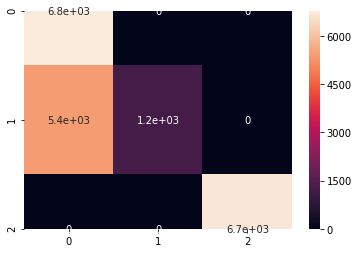

In [582]:
sns.heatmap(confusion_matrix(Y_test, prediction), annot=True)
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
print(confusion_matrix(Y_test, prediction))